Install Pycaret

In [2]:
pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 10.5 MB/

Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


Dataset

In [5]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/GowthamAddala/6220-Project/main/Diary_Queen_Nutrition_data.csv')
df.head(25)

Calories (kcal)  Fat Calories (kcal)  Total Fat (g)  Saturated Fat (g)  \
0               600                  100           27.0               21.0   
1               830                  170           39.0               31.0   
2              1100                  230           52.0               41.0   
3               360                  300           13.0                8.0   
4               620                  240           22.0               14.0   
5               890                  350           32.0               20.0   
6              1170                  470           43.0               27.0   
7               390                  110           16.0                8.0   
8               700                  200           30.0               14.0   
9               960                  290           42.0               19.0   
10             1240                  390           55.0               24.0   
11              760                  150           29.0               14.0   
12              700                  270           31.0                7.0   
13              360                  380           14.0                9.0   
14              560                  500           20.0               13.0   
15              720                  260           25.0               15.0   
16              940                  270           32.0               19.0   
17              720                  420           47.0               19.0   
18              920                  560           63.0               26.0   
19              720                  440           49.0               19.0   
20              910                  580           65.0               27.0   
21              320                  120           13.0                5.0   
22              460                  220           25.0               10.0   
23              610                  330           37.0               15.0   
24              820                  460           51.0               19.0   

    Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  Carbohydrates (g)  \
0             1.0                45          240                 79   
1             1.0                55          310                106   
2             1.5                75          410                140   
3             0.5                45          150                 53   
4             1.0                85          270                 93   
5             1.5               120          390                132   
6             2.0               160          520                175   
7             0.0                35          160                 54   
8             1.0                55          290                 95   
9             1.0                75          400                129   
10            1.5                95          520                167   
11            0.5                65          390                117   
12            0.0               105         2710                 88   
13            0.5                25          190                 52   
14            1.0                40          330                 86   
15            1.0                50          440                110   
16            1.5                70          570                145   
17            2.0               130         1890                 39   
18            2.5               180         2300                 40   
19            2.0               125         1430                 37   
20            2.5               170         1820                 38   
21            0.5                35          870                 36   
22            1.5                70         1030                 36   
23            2.0               110         1190                 36   
24            2.0               130         2080                 52   

    Sugars (g)  Protein (g)  Fiber (g)  class  
0           65         12.0          1      1  
1           86         16.0     

In [6]:
len(df.index)

225

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Calories (kcal)      225 non-null    int64  
 1   Fat Calories (kcal)  225 non-null    int64  
 2   Total Fat (g)        225 non-null    float64
 3   Saturated Fat (g)    225 non-null    float64
 4   Trans Fat (g)        225 non-null    float64
 5   Cholesterol (mg)     225 non-null    int64  
 6   Sodium (mg)          225 non-null    int64  
 7   Carbohydrates (g)    225 non-null    int64  
 8   Sugars (g)           225 non-null    int64  
 9   Protein (g)          225 non-null    float64
 10  Fiber (g)            225 non-null    int64  
 11  class                225 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 21.2 KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


Exploratory Data Analysis

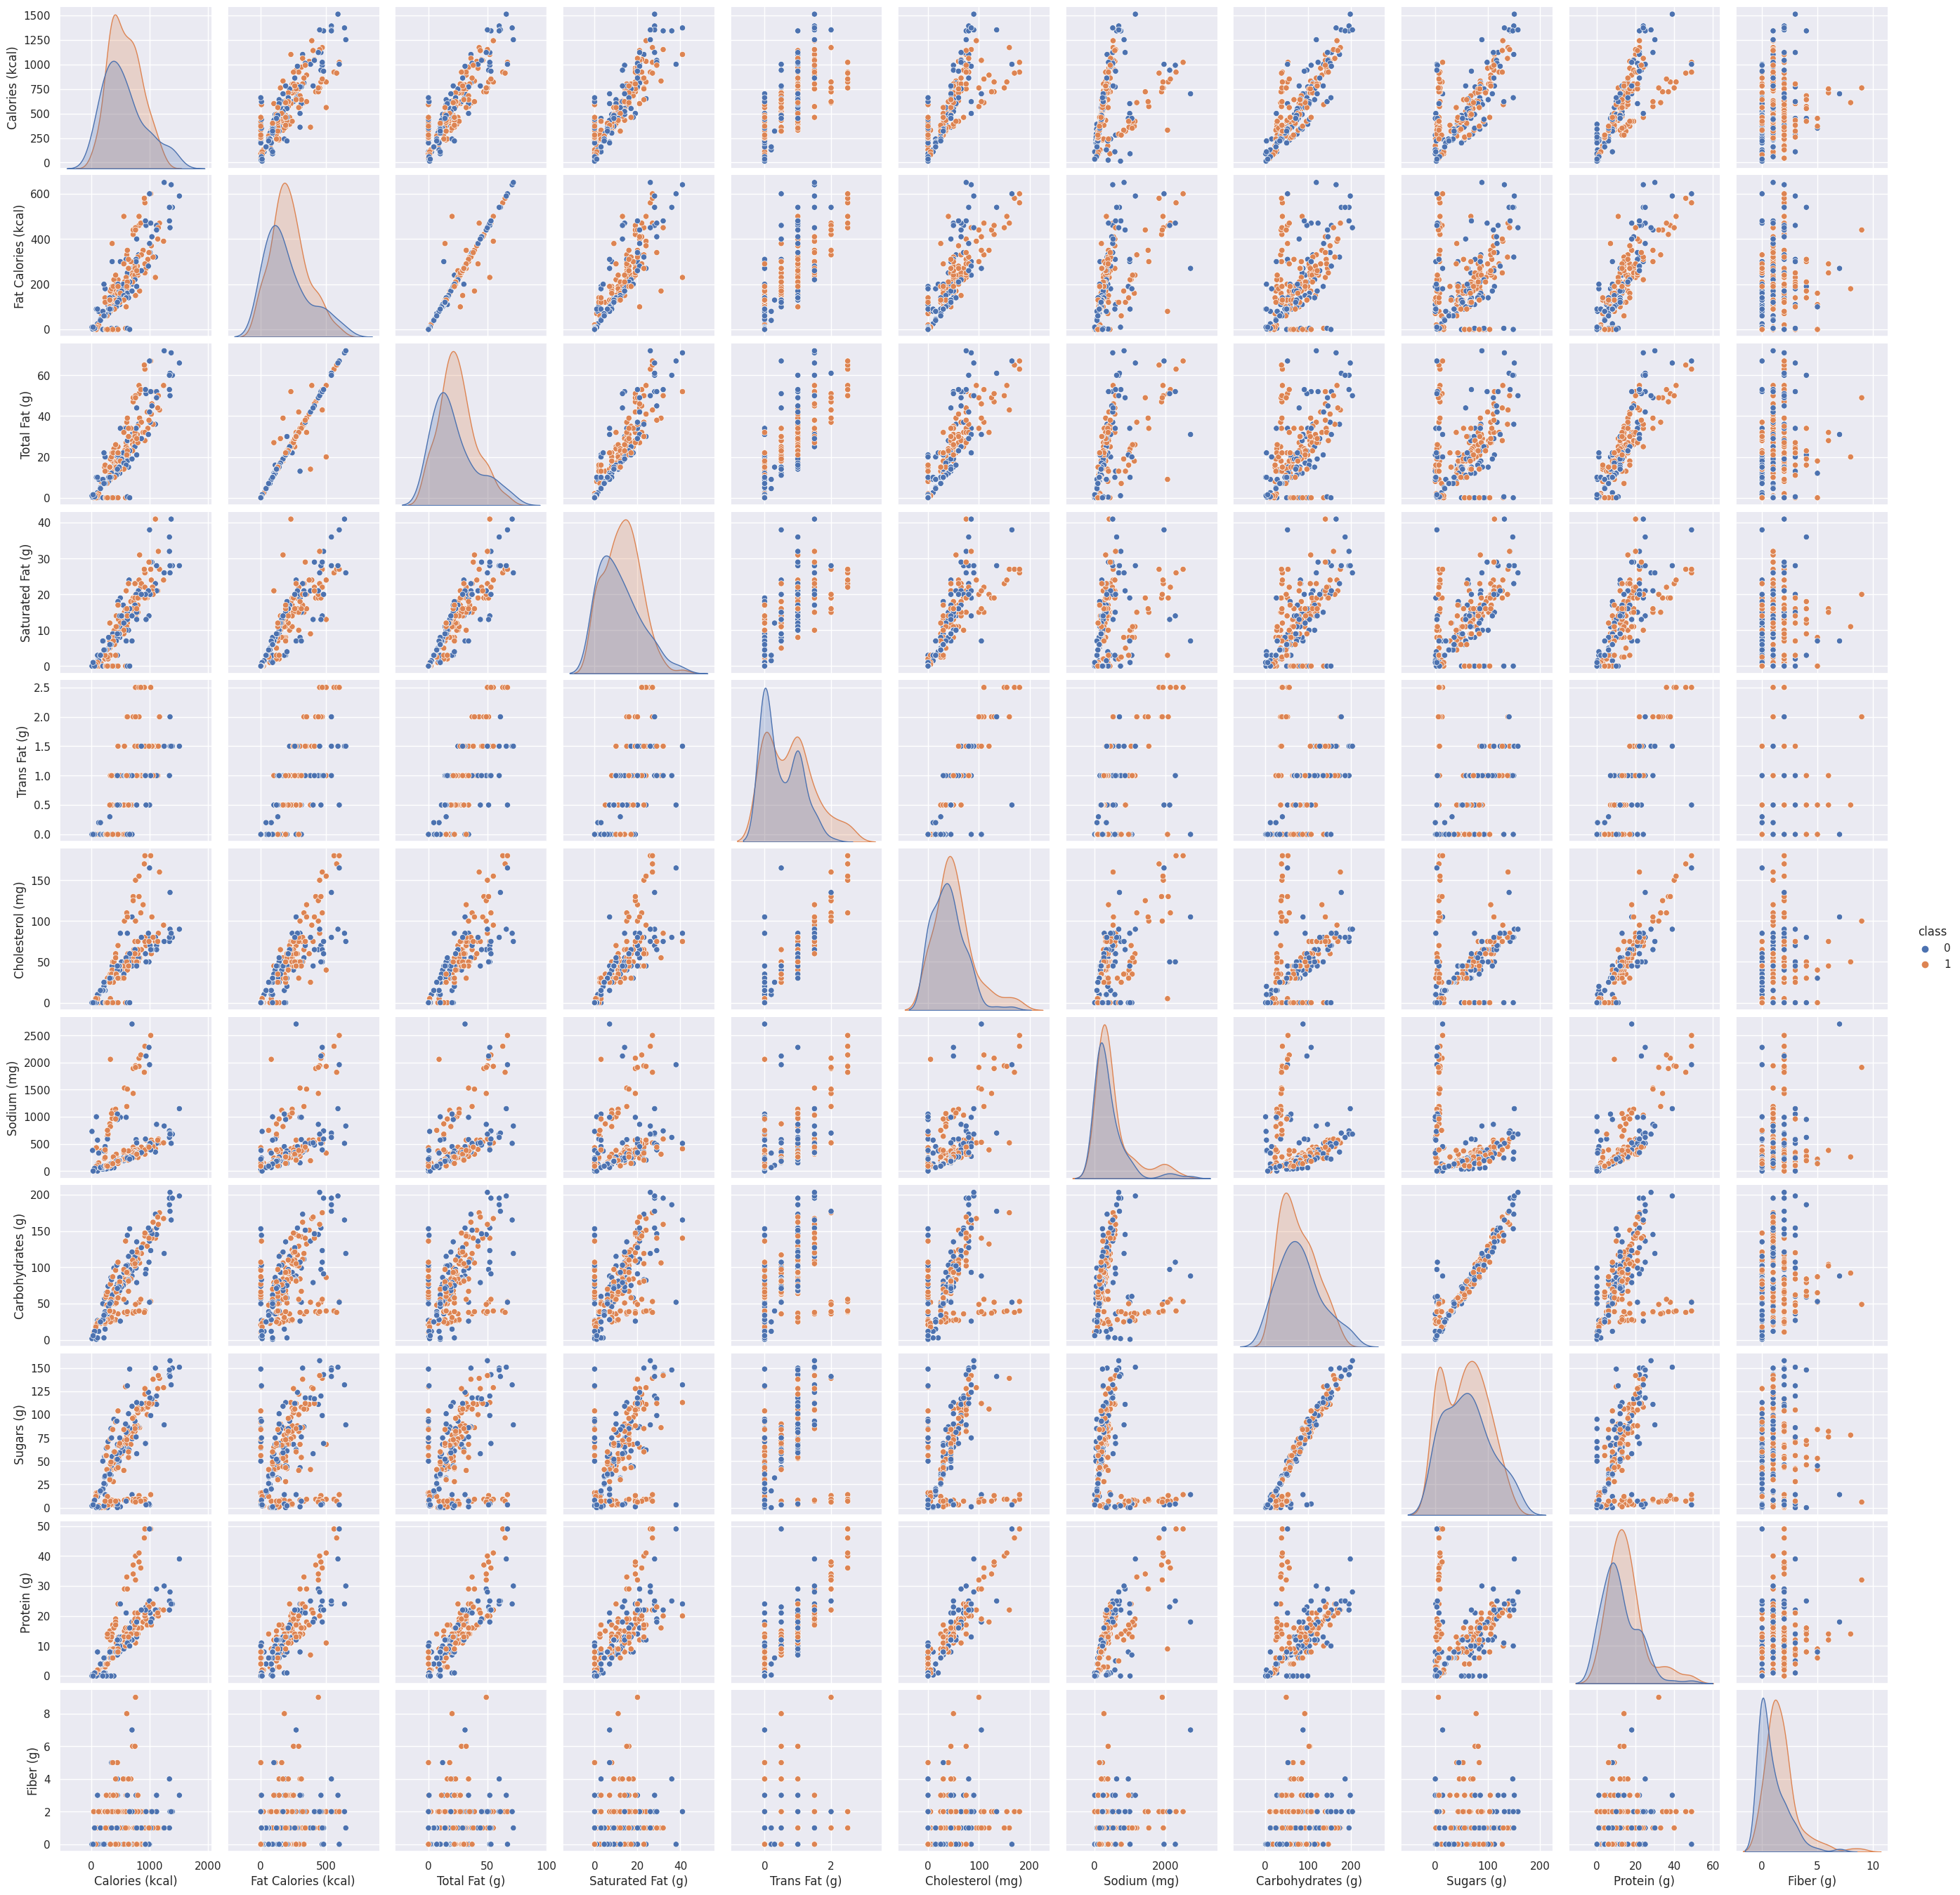

In [10]:
sns.pairplot(df, hue='class')
plt.show()

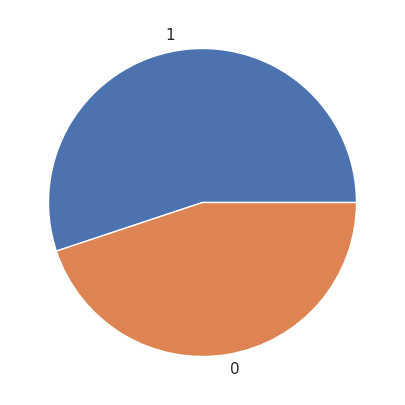

In [11]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

Data Matrix

In [12]:
X = df.drop(columns=['class'])
X.head(10)

Calories (kcal)  Fat Calories (kcal)  Total Fat (g)  Saturated Fat (g)  \
0              600                  100           27.0               21.0   
1              830                  170           39.0               31.0   
2             1100                  230           52.0               41.0   
3              360                  300           13.0                8.0   
4              620                  240           22.0               14.0   
5              890                  350           32.0               20.0   
6             1170                  470           43.0               27.0   
7              390                  110           16.0                8.0   
8              700                  200           30.0               14.0   
9              960                  290           42.0               19.0   

   Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  Carbohydrates (g)  \
0            1.0                45          240                 79   
1            1.0                55          310                106   
2            1.5                75          410                140   
3            0.5                45          150                 53   
4            1.0                85          270                 93   
5            1.5               120          390                132   
6            2.0               160          520                175   
7            0.0                35          160                 54   
8            1.0                55          290                 95   
9            1.0                75          400                129   

   Sugars (g)  Protein (g)  Fiber (g)  
0          65         12.0          1  
1          86         16.0          1  
2         113         20.0          2  
3          43          8.0          0  
4          75         13.0          0  
5         106         18.0          1  
6         139         22.0          1  
7          42          8.0          0  
8          74         13.0          0  
9         100         17.0          1

In [13]:
X.describe().transpose()

count        mean         std   min    25%    50%    75%  \
Calories (kcal)      225.0  573.377778  312.616642  15.0  340.0  520.0  760.0   
Fat Calories (kcal)  225.0  209.253333  152.340938   0.0  100.0  180.0  290.0   
Total Fat (g)        225.0   23.270222   16.933841   0.0   12.0   20.0   32.0   
Saturated Fat (g)    225.0   12.315556    8.985627   0.0    6.0   12.0   19.0   
Trans Fat (g)        225.0    0.649778    0.659486   0.0    0.0    0.5    1.0   
Cholesterol (mg)     225.0   46.466667   36.794919   0.0   25.0   45.0   65.0   
Sodium (mg)          225.0  467.977778  517.629189   0.0  170.0  280.0  520.0   
Carbohydrates (g)    225.0   78.537778   44.840189   1.0   40.0   73.0  107.0   
Sugars (g)           225.0   59.226667   42.178058   0.0   16.0   59.0   87.0   
Protein (g)          225.0   13.599111    9.637811   0.0    8.0   12.0   18.0   
Fiber (g)            225.0    1.364444    1.467072   0.0    0.0    1.0    2.0   

                        max  
Calories (kcal)      1510.0  
Fat Calories (kcal)   650.0  
Total Fat (g)          72.0  
Saturated Fat (g)      41.0  
Trans Fat (g)           2.5  
Cholesterol (mg)      180.0  
Sodium (mg)          2710.0  
Carbohydrates (g)     203.0  
Sugars (g)            158.0  
Protein (g)            49.0  
Fiber (g)               9.0

Standardize the Data

In [14]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Calories (kcal)  Fat Calories (kcal)  Total Fat (g)  Saturated Fat (g)  \
0         0.085349            -0.718762       0.220747           0.968637   
1         0.822715            -0.258242       0.930967           2.084006   
2         1.688318             0.136489       1.700372           3.199376   
3        -0.684076             0.597010      -0.607843          -0.481344   
4         0.149468             0.202278      -0.075178           0.187878   
5         1.015071             0.925953       0.516672           0.857100   
6         1.912734             1.715416       1.167707           1.637858   
7        -0.587898            -0.652974      -0.430288          -0.481344   
8         0.405943            -0.060876       0.398302           0.187878   
9         1.239487             0.531221       1.108522           0.745563   

   Trans Fat (g)  Cholesterol (mg)  Sodium (mg)  Carbohydrates (g)  \
0       0.532237         -0.039949    -0.441409           0.010331   
1       0.532237          0.232433    -0.305875           0.613812   
2       1.292094          0.777198    -0.112256           1.373751   
3      -0.227619         -0.039949    -0.615666          -0.570799   
4       0.532237          1.049581    -0.383323           0.323247   
5       1.292094          2.002920    -0.150980           1.194942   
6       2.051951          3.092451     0.100725           2.156041   
7      -0.987476         -0.312332    -0.596304          -0.548447   
8       0.532237          0.232433    -0.344599           0.367950   
9       0.532237          0.777198    -0.131618           1.127889   

   Sugars (g)  Protein (g)  Fiber (g)  
0    0.137185    -0.166291  -0.248970  
1    0.636185     0.249667  -0.248970  
2    1.277755     0.665624   0.434179  
3   -0.385576    -0.582248  -0.932119  
4    0.374804    -0.062301  -0.932119  
5    1.111422     0.457646  -0.248970  
6    1.895564     0.873603  -0.248970  
7   -0.409338    -0.582248  -0.932119  
8    0.351042    -0.062301  -0.932119  
9    0.968851     0.353656  -0.248970

In [15]:
X.describe().transpose()

count          mean      std       min       25%  \
Calories (kcal)      225.0  1.263187e-16  1.00223 -1.790125 -0.748195   
Fat Calories (kcal)  225.0  0.000000e+00  1.00223 -1.376648 -0.718762   
Total Fat (g)        225.0 -9.473903e-17  1.00223 -1.377249 -0.667028   
Saturated Fat (g)    225.0  3.157968e-17  1.00223 -1.373640 -0.704418   
Trans Fat (g)        225.0  1.894781e-16  1.00223 -0.987476 -0.987476   
Cholesterol (mg)     225.0 -3.157968e-17  1.00223 -1.265671 -0.584715   
Sodium (mg)          225.0  3.157968e-17  1.00223 -0.906095 -0.576942   
Carbohydrates (g)    225.0  2.368476e-17  1.00223 -1.733058 -0.861364   
Sugars (g)           225.0  0.000000e+00  1.00223 -1.407337 -1.027147   
Protein (g)          225.0 -1.263187e-16  1.00223 -1.414163 -0.582248   
Fiber (g)            225.0  3.157968e-17  1.00223 -0.932119 -0.932119   

                          50%       75%       max  
Calories (kcal)     -0.171126  0.598299  3.002753  
Fat Calories (kcal) -0.192454  0.531221  2.899610  
Total Fat (g)       -0.193548  0.516672  2.884073  
Saturated Fat (g)   -0.035196  0.745563  3.199376  
Trans Fat (g)       -0.227619  0.532237  2.811807  
Cholesterol (mg)    -0.039949  0.504816  3.637216  
Sodium (mg)         -0.363961  0.100725  4.340986  
Carbohydrates (g)   -0.123776  0.636163  2.781873  
Sugars (g)          -0.005386  0.659946  2.347039  
Protein (g)         -0.166291  0.457646  3.681315  
Fiber (g)           -0.248970  0.434179  5.216225

Observations and variables

In [16]:
observations = list(df.index)
variables = list(df.columns)

Box and Whisker Plots

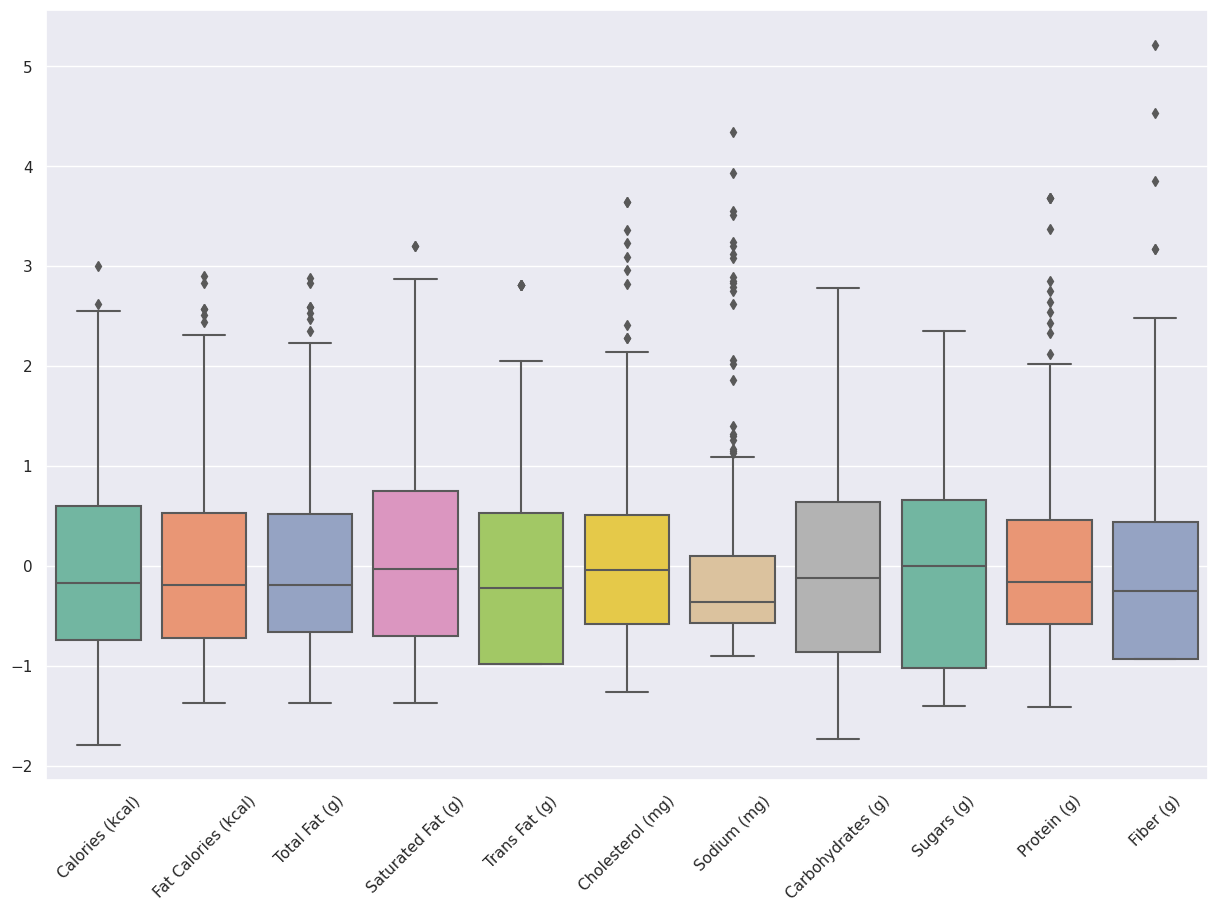

In [17]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


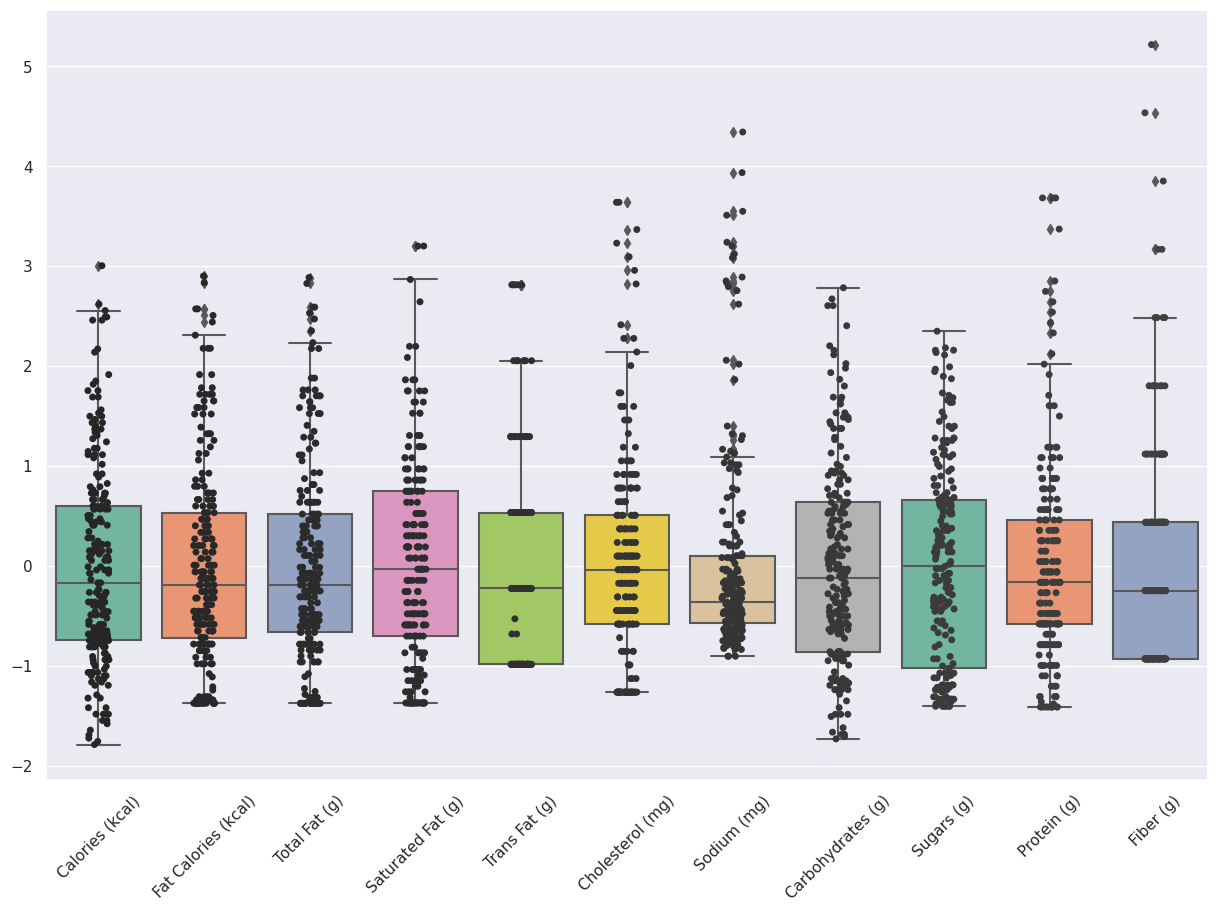

In [18]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Correlation Matrix

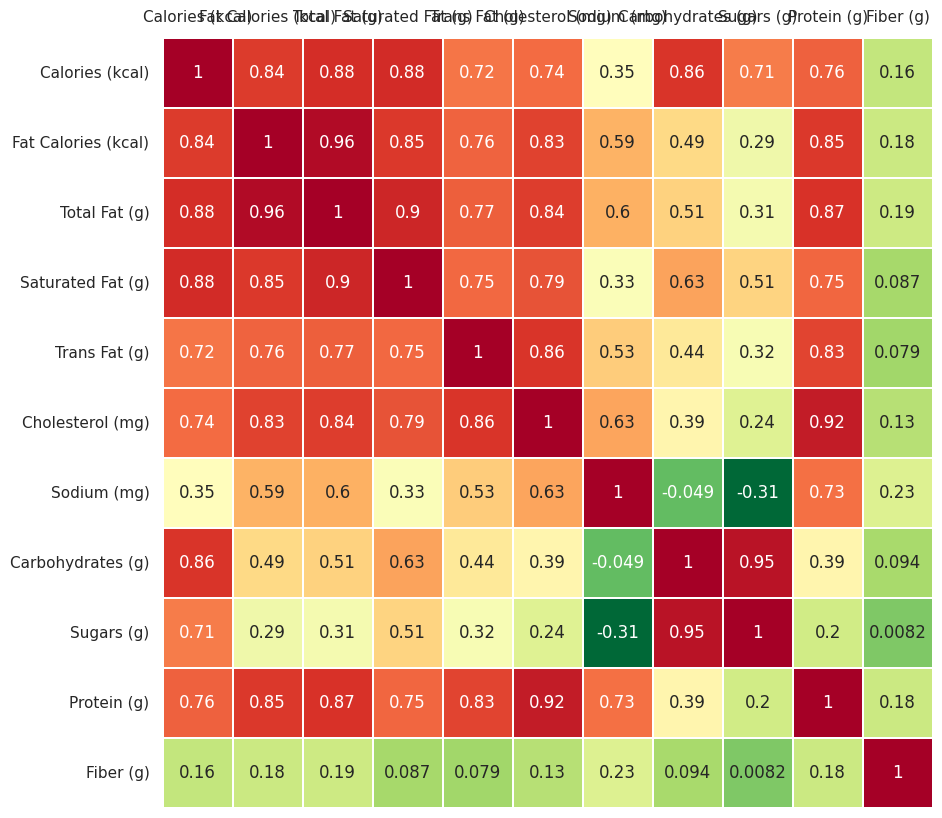

In [19]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Principal Component Analysis (PCA)

Text(0, 0.5, '$Z_2$')

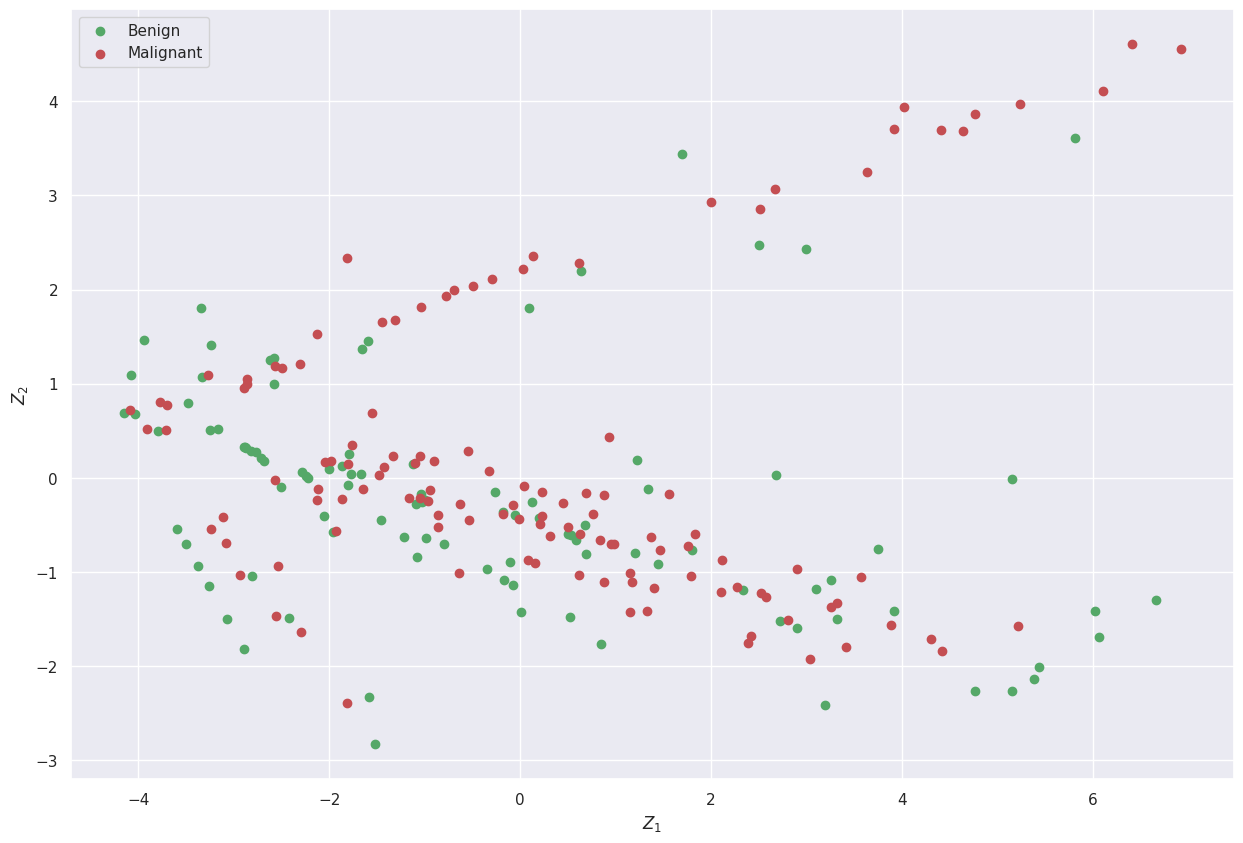

In [20]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

Eigenvectors

array([[ 3.58369626e-01, -2.08412835e-01,  5.01224047e-02,
         6.71477567e-02,  2.22396945e-01, -3.46396189e-02,
        -7.27693830e-03, -5.44352722e-02, -3.27262769e-01,
        -1.71984309e-01, -7.94202899e-01],
       [ 3.55226413e-01,  9.73915508e-02, -1.13531093e-02,
         4.14062021e-01,  5.43991689e-02, -2.49808626e-01,
        -5.74959632e-01,  1.40828911e-01,  5.20008964e-01,
        -8.08235318e-02, -6.00706116e-03],
       [ 3.62658481e-01,  8.74240026e-02, -8.44829623e-03,
         4.08144187e-01,  4.80165102e-02, -1.42828707e-01,
        -3.77910017e-02, -6.54077758e-02, -6.26898172e-01,
         3.58402425e-01,  3.79891091e-01],
       [ 3.47732447e-01, -9.66331089e-02, -8.84930209e-02,
         3.95294685e-01, -3.25008732e-01,  1.08464225e-01,
         6.94960375e-01, -2.99323441e-02,  3.15920599e-01,
        -6.75130860e-02, -5.51468624e-03],
       [ 3.28595634e-01,  8.84597252e-02, -1.49654134e-01,
        -5.21802258e-01, -4.31660819e-01, -6.28077207e-01,
  

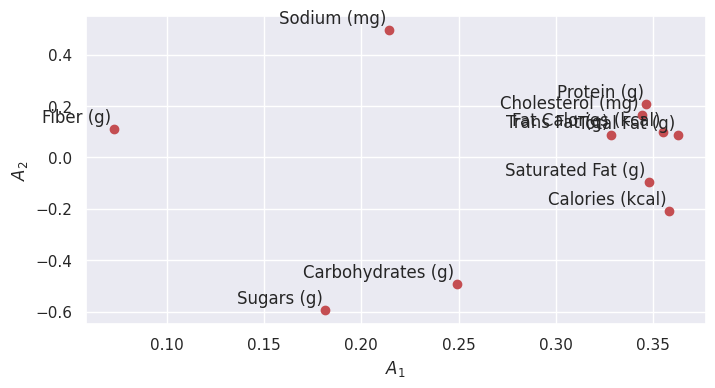

In [21]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  self._transforms = np.empty((0, 3, 3))


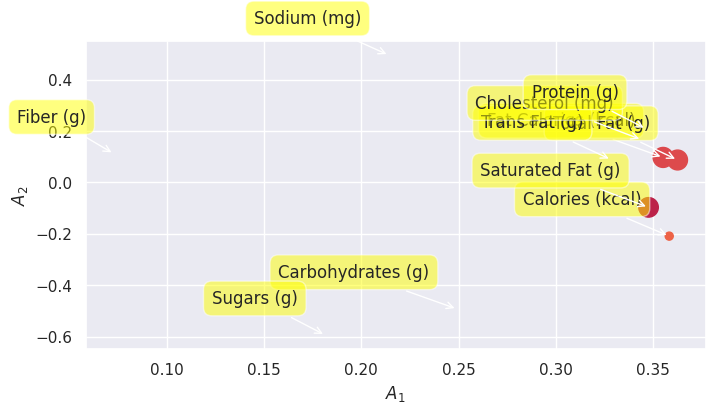

In [22]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Scree plot

array([6.91883440e+00, 2.10131735e+00, 9.90883474e-01, 3.68314349e-01,
       3.33651314e-01, 1.41559666e-01, 8.92385498e-02, 6.19832626e-02,
       2.79215508e-02, 1.51415649e-02, 2.61659773e-04])

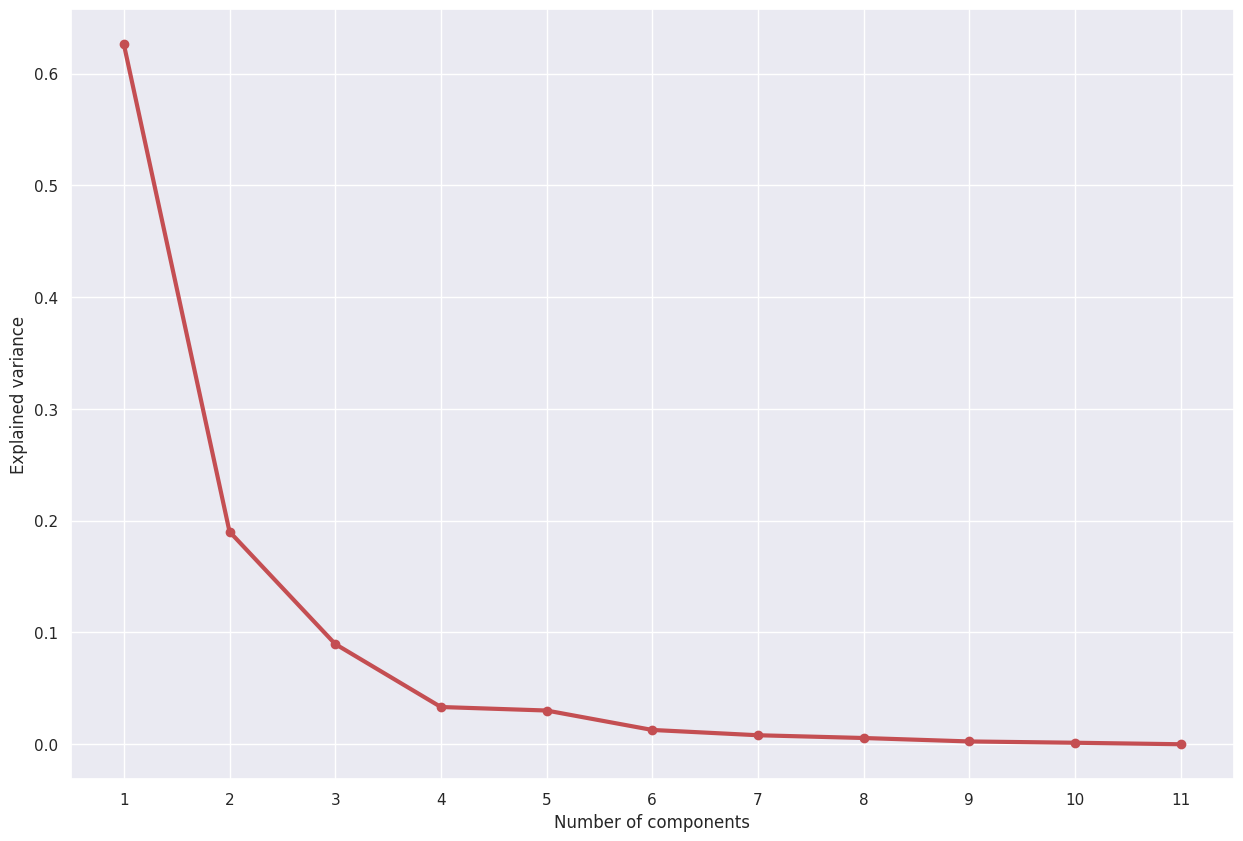

In [23]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

Explained Variance

Text(0, 0.5, 'Cumulative explained variance')

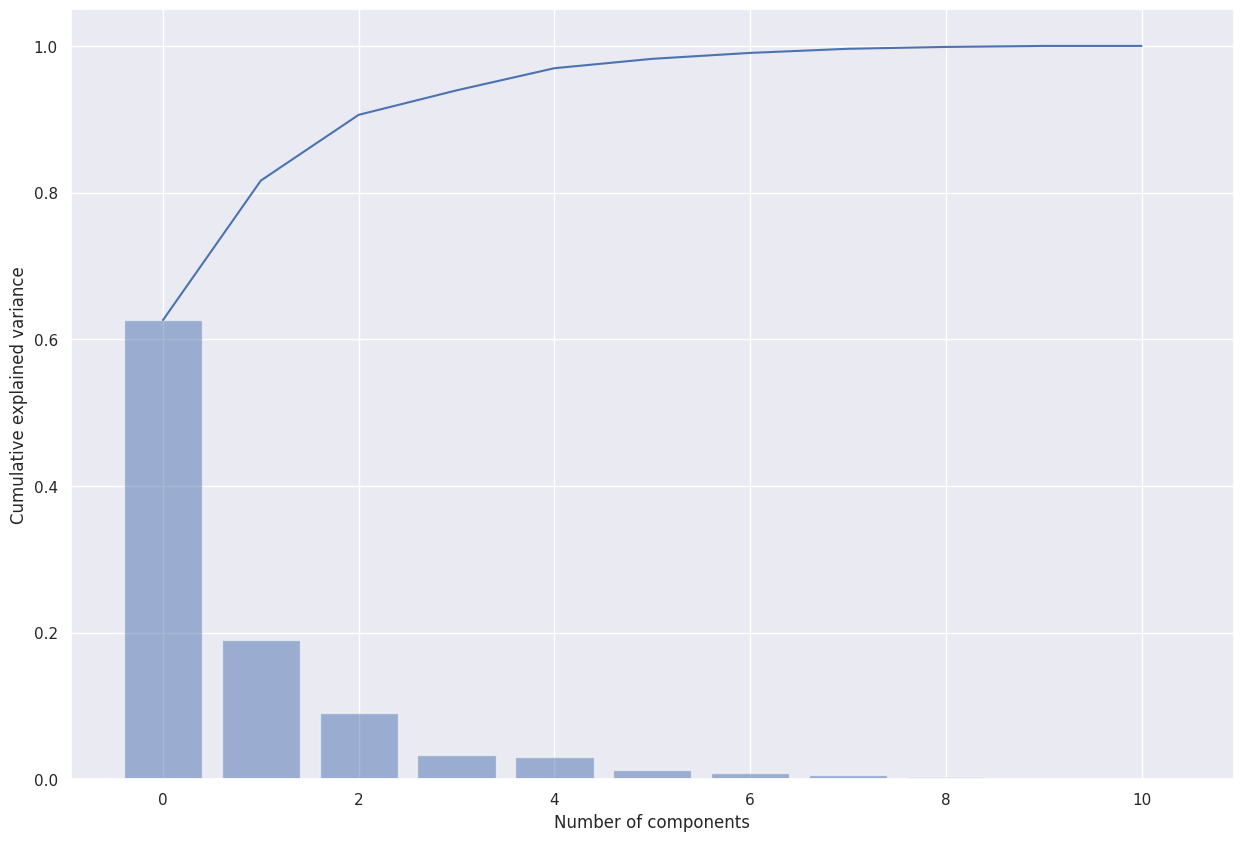

In [24]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Biplot

array([-4.88845697e-01, -1.03765523e+00, -1.55860459e+00,  1.47336411e-01,
       -5.02931610e-01, -9.67033928e-01, -1.57491778e+00, -7.86739568e-02,
       -6.65015437e-01, -1.15487981e+00, -1.71065298e+00, -1.02690769e+00,
        3.43458251e+00,  2.34675430e-01, -1.56921744e-01, -7.01508338e-01,
       -1.22435304e+00,  3.70666229e+00,  4.60462382e+00,  3.25206807e+00,
        4.10417313e+00,  1.65770386e+00,  2.27708282e+00,  2.85158137e+00,
        3.69037674e+00,  4.55138907e+00,  2.03605178e+00,  2.93401331e+00,
        3.86575655e+00,  3.06957046e+00,  3.97273572e+00,  2.35108537e+00,
        2.11456353e+00,  2.21471250e+00,  3.68636398e+00,  1.99526508e+00,
        1.81356081e+00,  1.92670864e+00,  7.19236326e-01,  5.02251649e-01,
        1.53065013e+00,  1.09717987e+00,  7.97344576e-01,  2.19738663e+00,
        3.60611721e+00,  1.04457396e+00,  1.45294190e+00,  1.25165879e+00,
        9.51016145e-01,  9.96872195e-01,  1.37178654e+00,  1.18599330e+00,
        7.78125845e-01,  

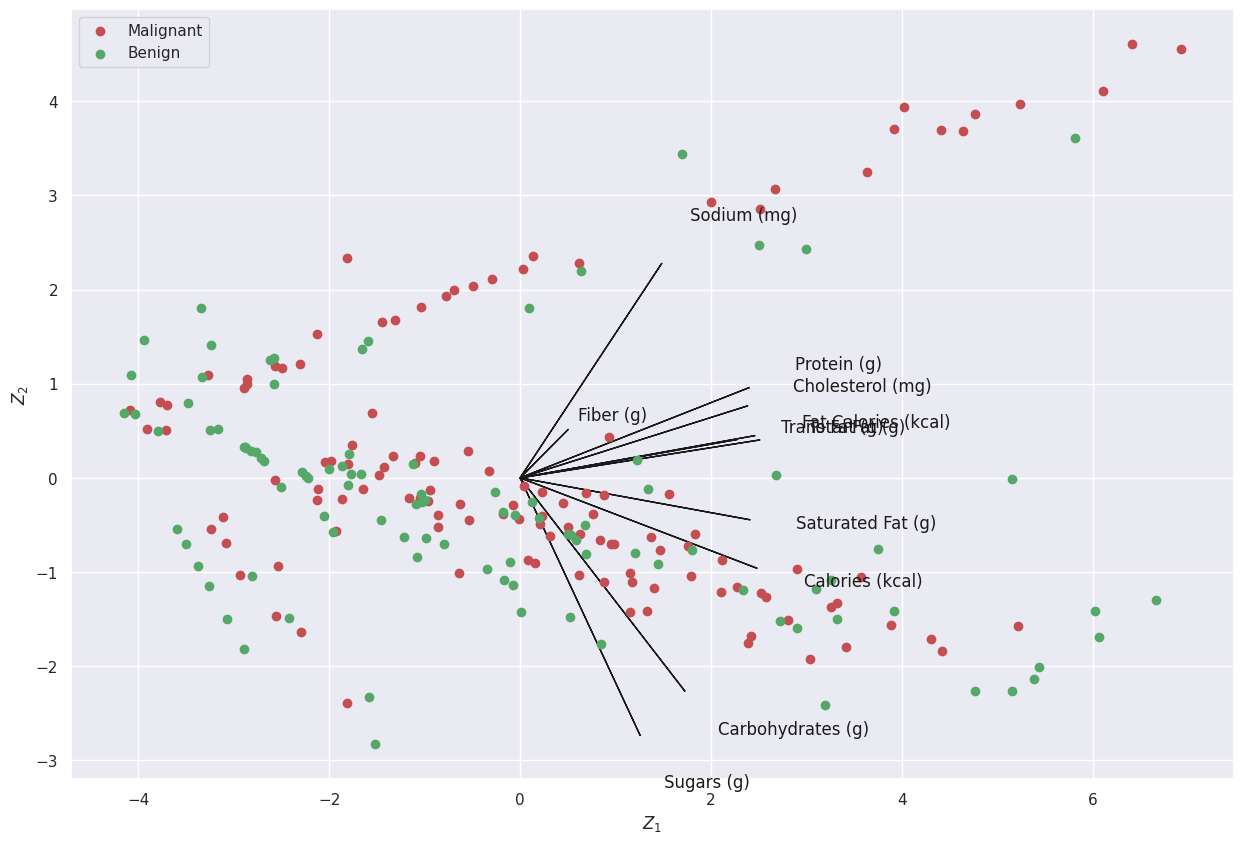

In [25]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')

plt.legend(loc='upper left')
Z1
Z2

Using PCA Library

In [26]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.3 MB/s eta 0:00:00


In [27]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [11] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Principal Components

In [28]:
out['PC']

PC1       PC2       PC3       PC4       PC5
0    0.210443 -0.488846 -0.398845  0.019850 -0.764260
1    1.791739 -1.037655 -0.413565  0.595755 -0.631911
2    3.887576 -1.558605  0.125014  0.626929 -0.925791
3   -1.123282  0.147336 -0.952417  0.360282 -0.325041
4    0.676832 -0.502932 -1.064192 -0.396850 -0.459268
..        ...       ...       ...       ...       ...
220 -1.582915 -2.326588  1.775637 -1.343411  1.213919
221 -2.294539 -1.636422  0.965458 -1.008568  0.827033
222 -2.537356 -0.931849  2.856852 -0.839259  0.065970
223 -3.079581 -0.687943  0.785431 -0.555910  0.187008
224 -1.525595 -2.829027  1.173540 -1.442860  1.456402

[225 rows x 5 columns]

Scatter plot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [98.23%] of the variance'}, xlabel='PC1 (62.6% expl.var)', ylabel='PC2 (19.0% expl.var)'>)

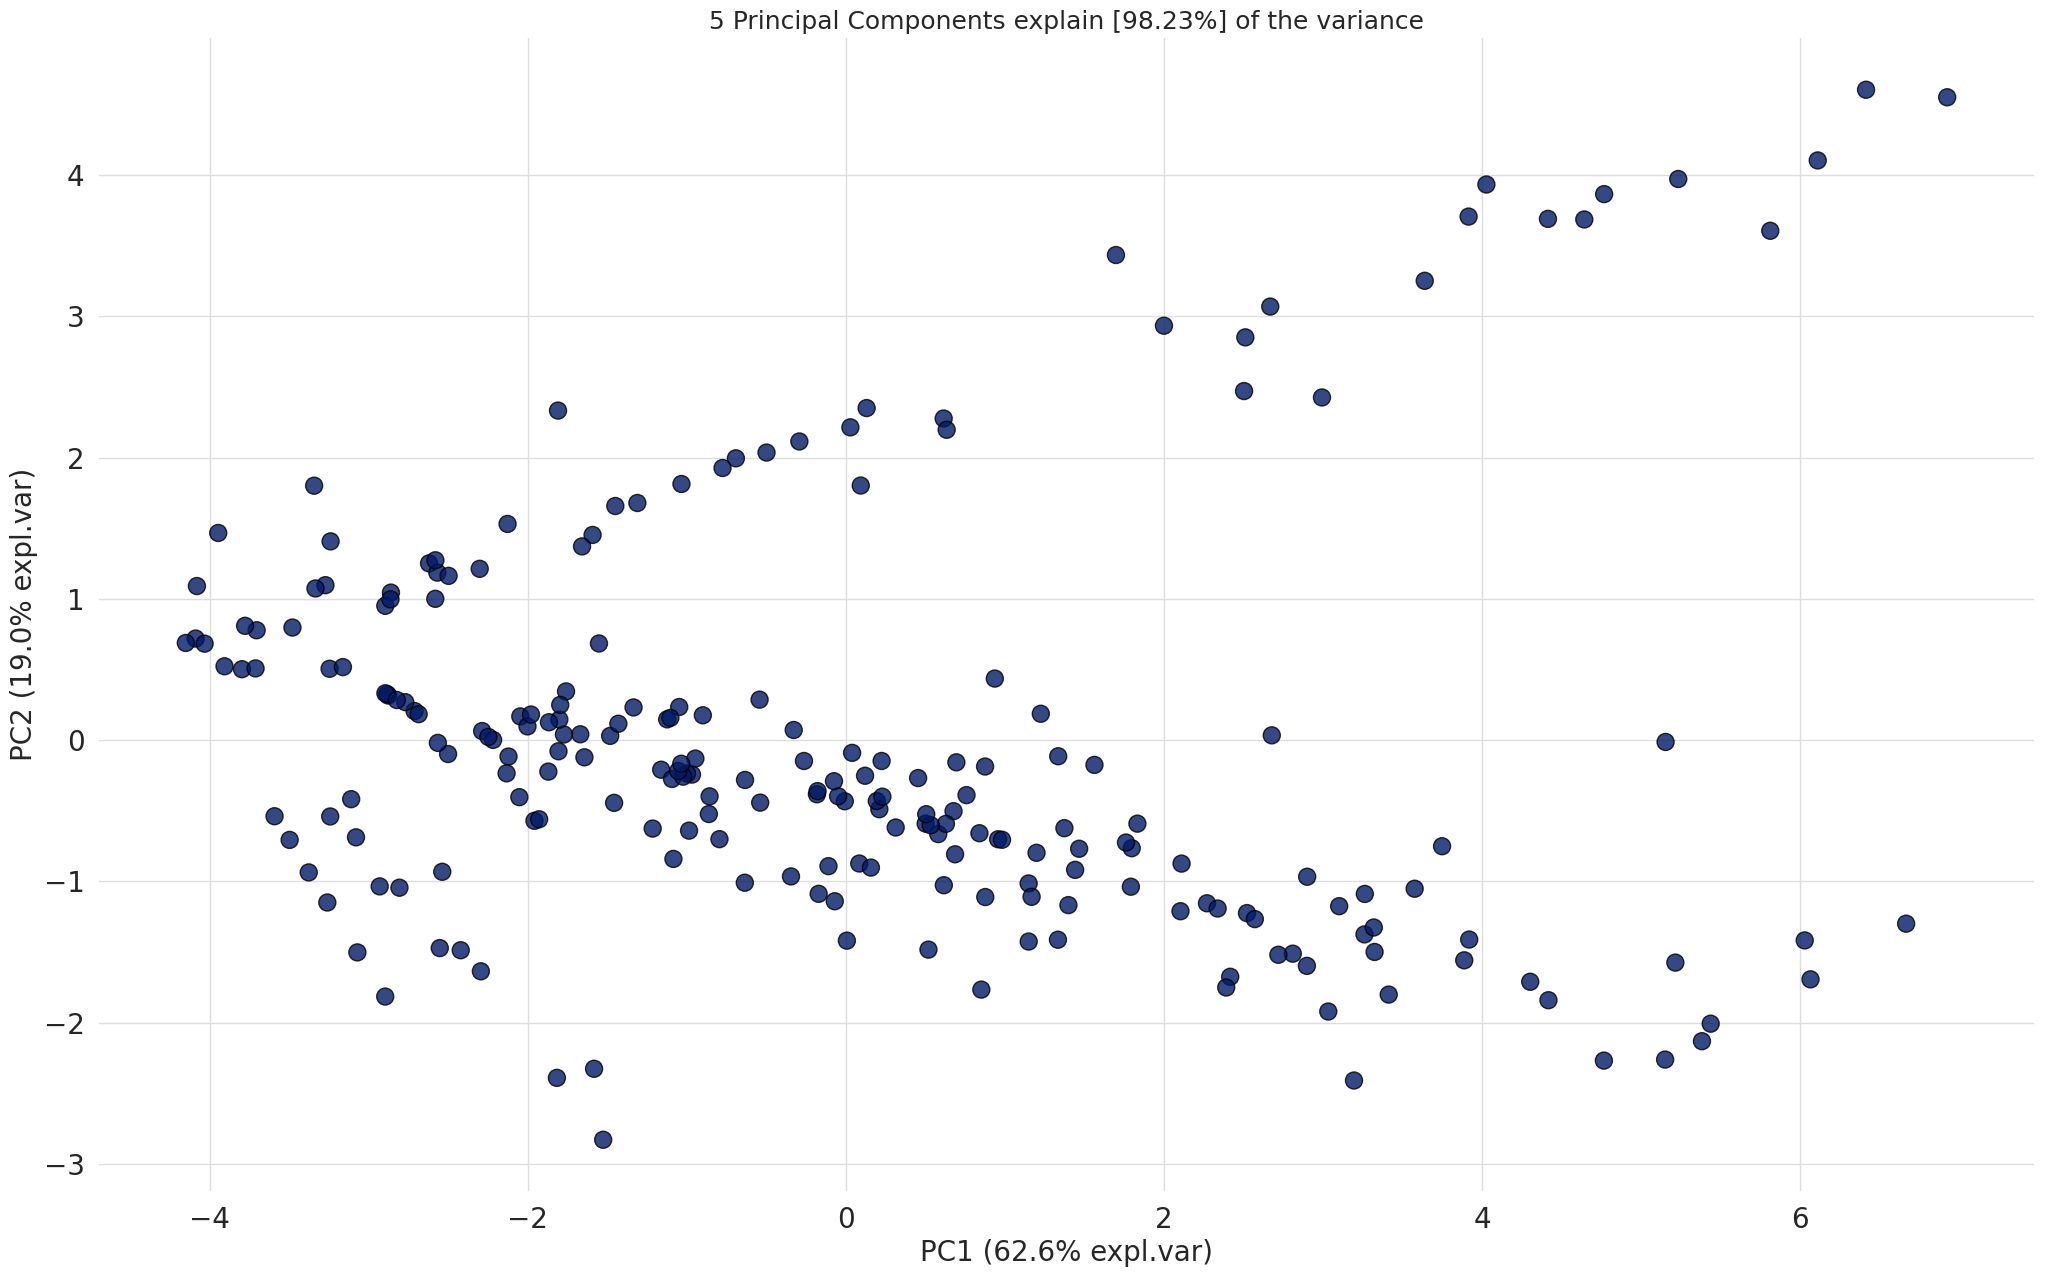

In [29]:
model.scatter(label=True, legend=False)

Eigenvectors

In [30]:
A = out['loadings'].T
A

PC1       PC2       PC3       PC4       PC5
Calories (kcal)      0.358370 -0.208413  0.050122  0.067148  0.222397
Fat Calories (kcal)  0.355226  0.097392 -0.011353  0.414062  0.054399
Total Fat (g)        0.362658  0.087424 -0.008448  0.408144  0.048017
Saturated Fat (g)    0.347732 -0.096633 -0.088493  0.395295 -0.325009
Trans Fat (g)        0.328596  0.088460 -0.149654 -0.521802 -0.431661
Cholesterol (mg)     0.344269  0.166021 -0.108019 -0.230492 -0.286975
Sodium (mg)          0.214268  0.494508  0.055511 -0.223814  0.634036
Carbohydrates (g)    0.249328 -0.491882  0.111477 -0.163120  0.336515
Sugars (g)           0.181559 -0.593686  0.061713 -0.232434  0.074708
Protein (g)          0.346584  0.208085 -0.043075 -0.210413  0.056703
Fiber (g)            0.072739  0.111629  0.966550 -0.028280 -0.216606

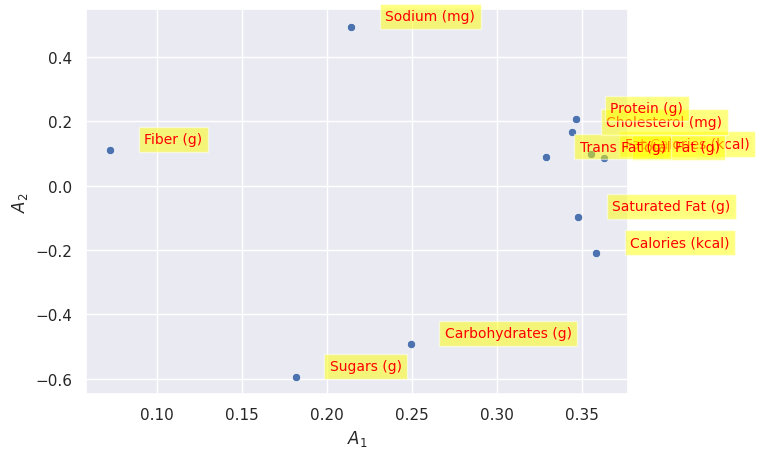

In [31]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

Scree Plot

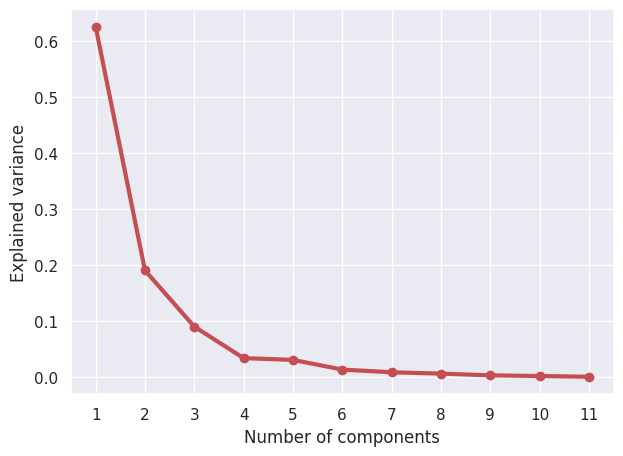

In [32]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

Explained Variance Plot

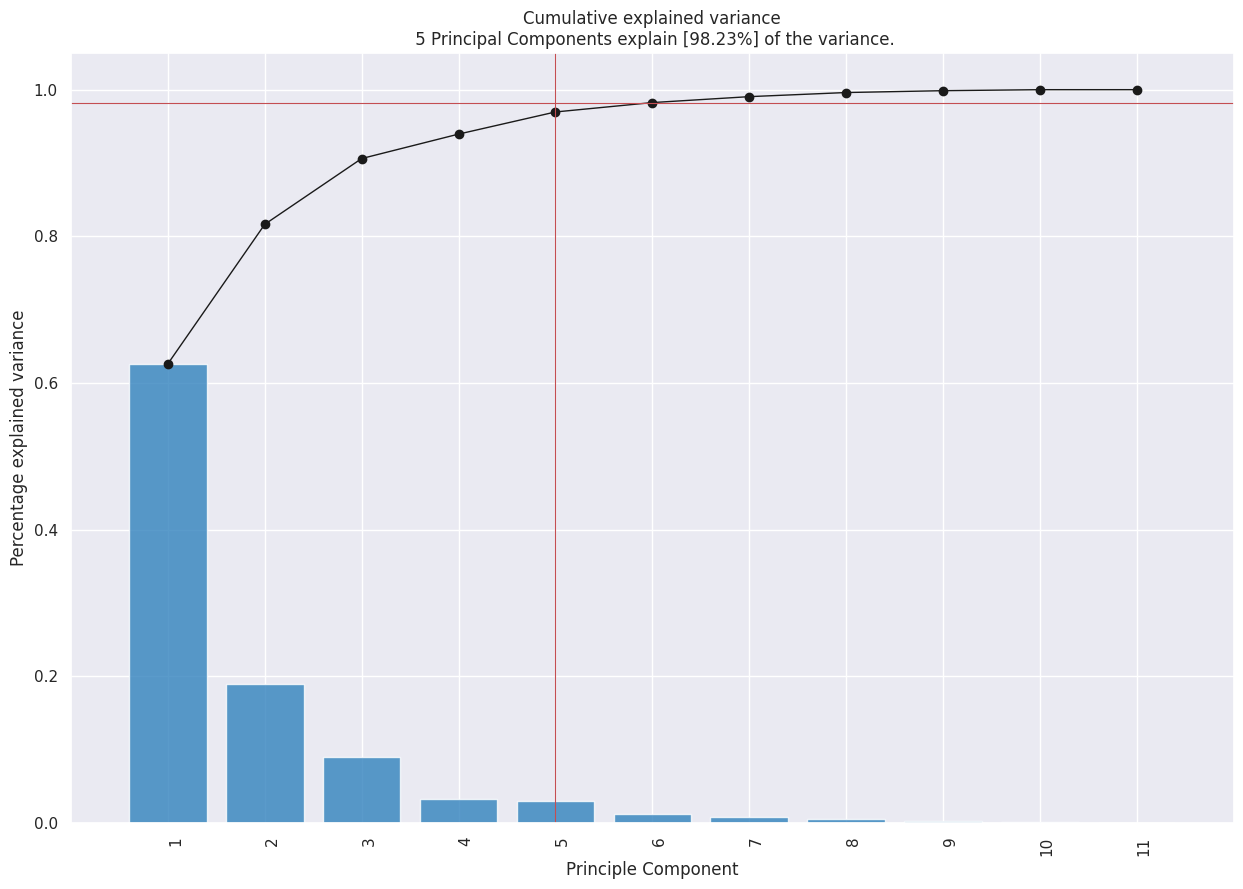

In [33]:
model.plot();

Biplot

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '5 Principal Components explain [98.23%] of the variance'}, xlabel='PC1 (62.6% expl.var)', ylabel='PC2 (19.0% expl.var)'>)

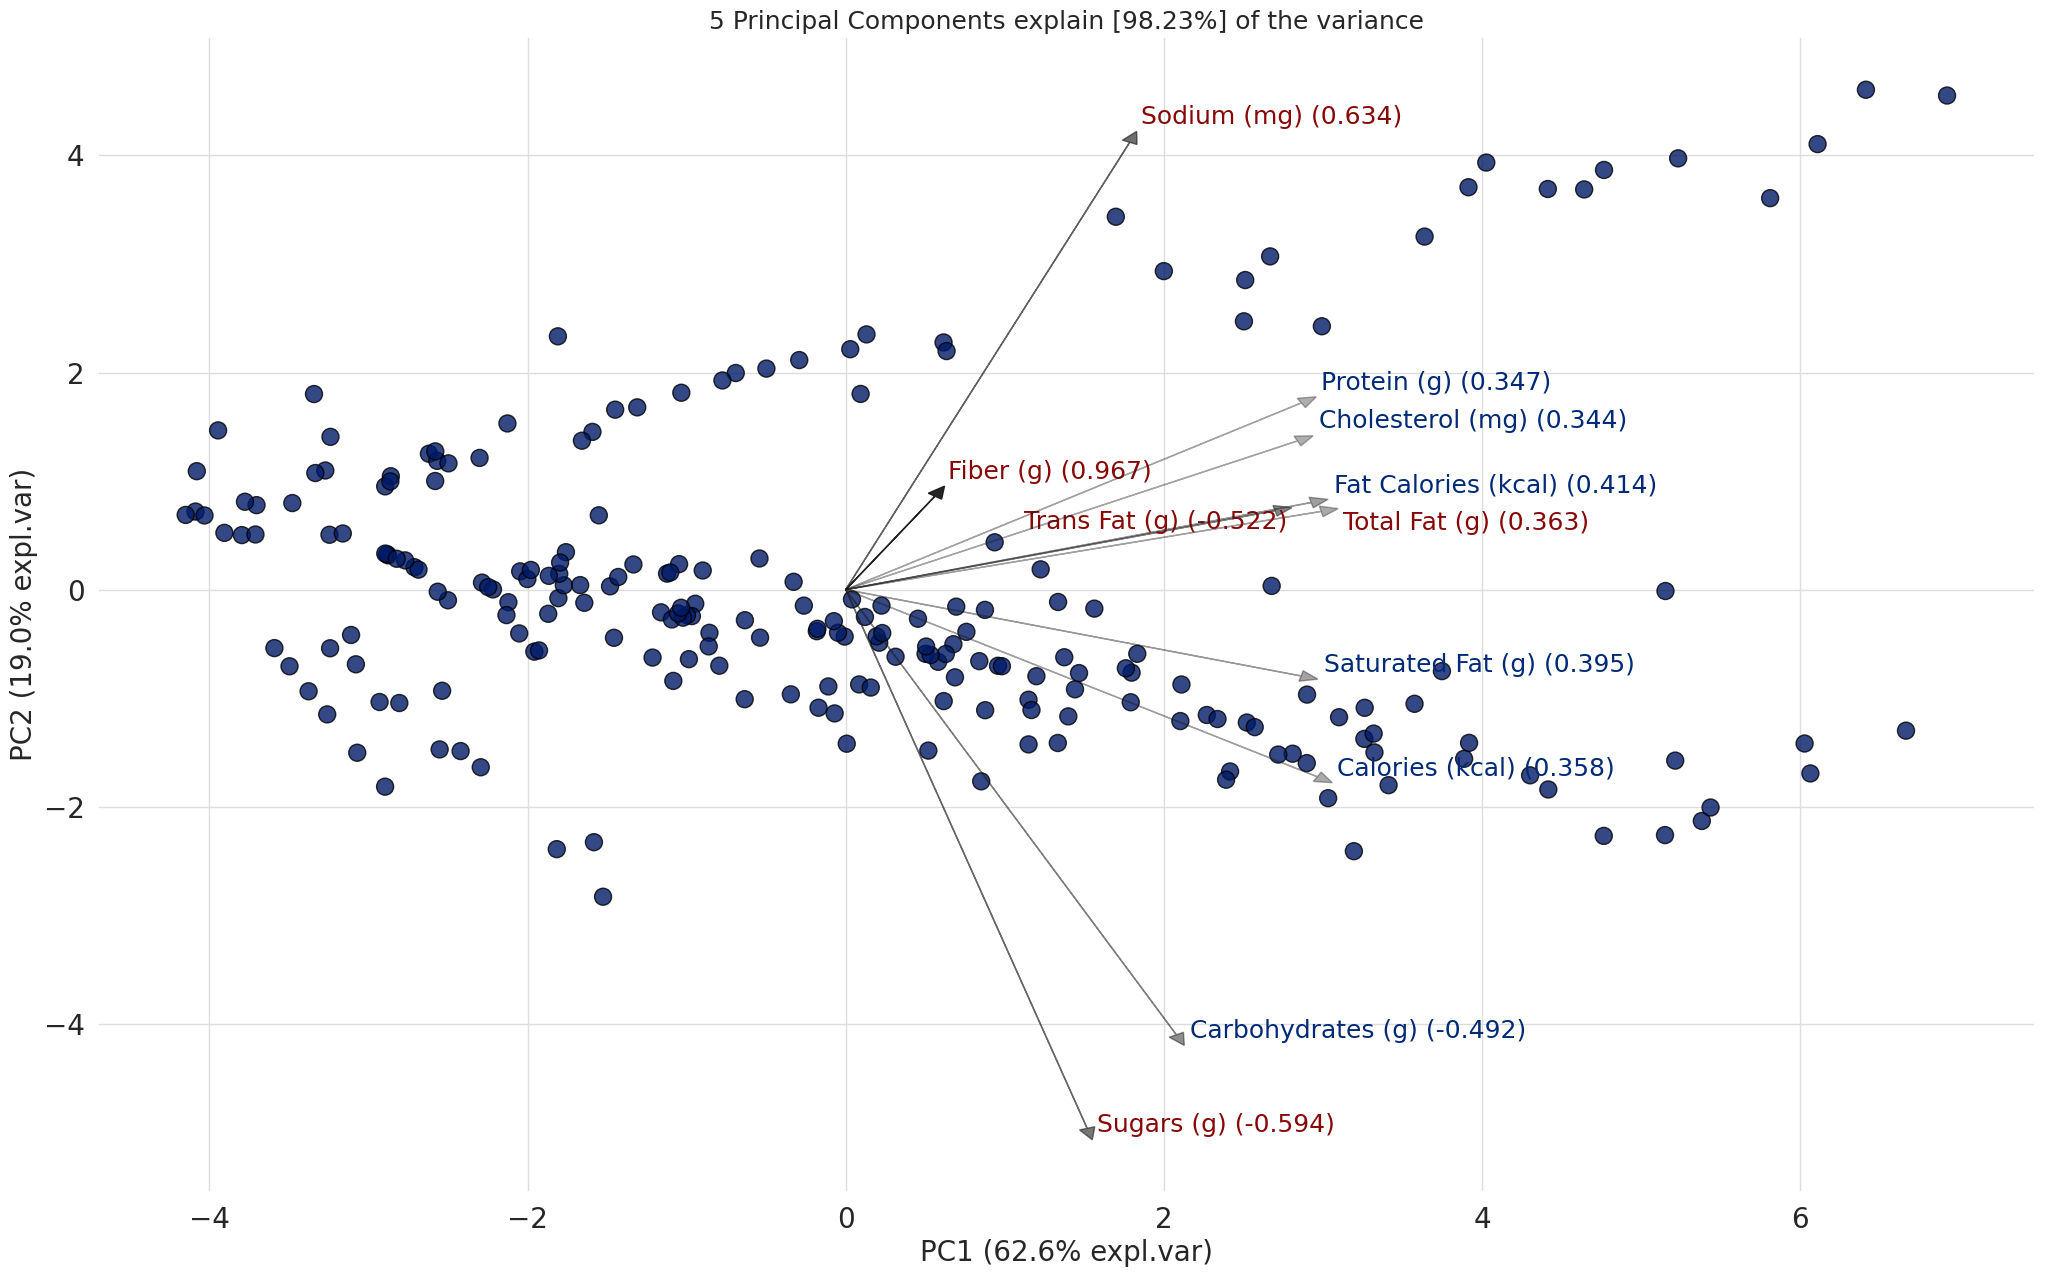

In [34]:
model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '5 Principal Components explain [98.23%] of the variance'}, xlabel='PC1 (62.6% expl.var)', ylabel='PC2 (19.0% expl.var)', zlabel='PC3 (8.96% expl.var)'>)

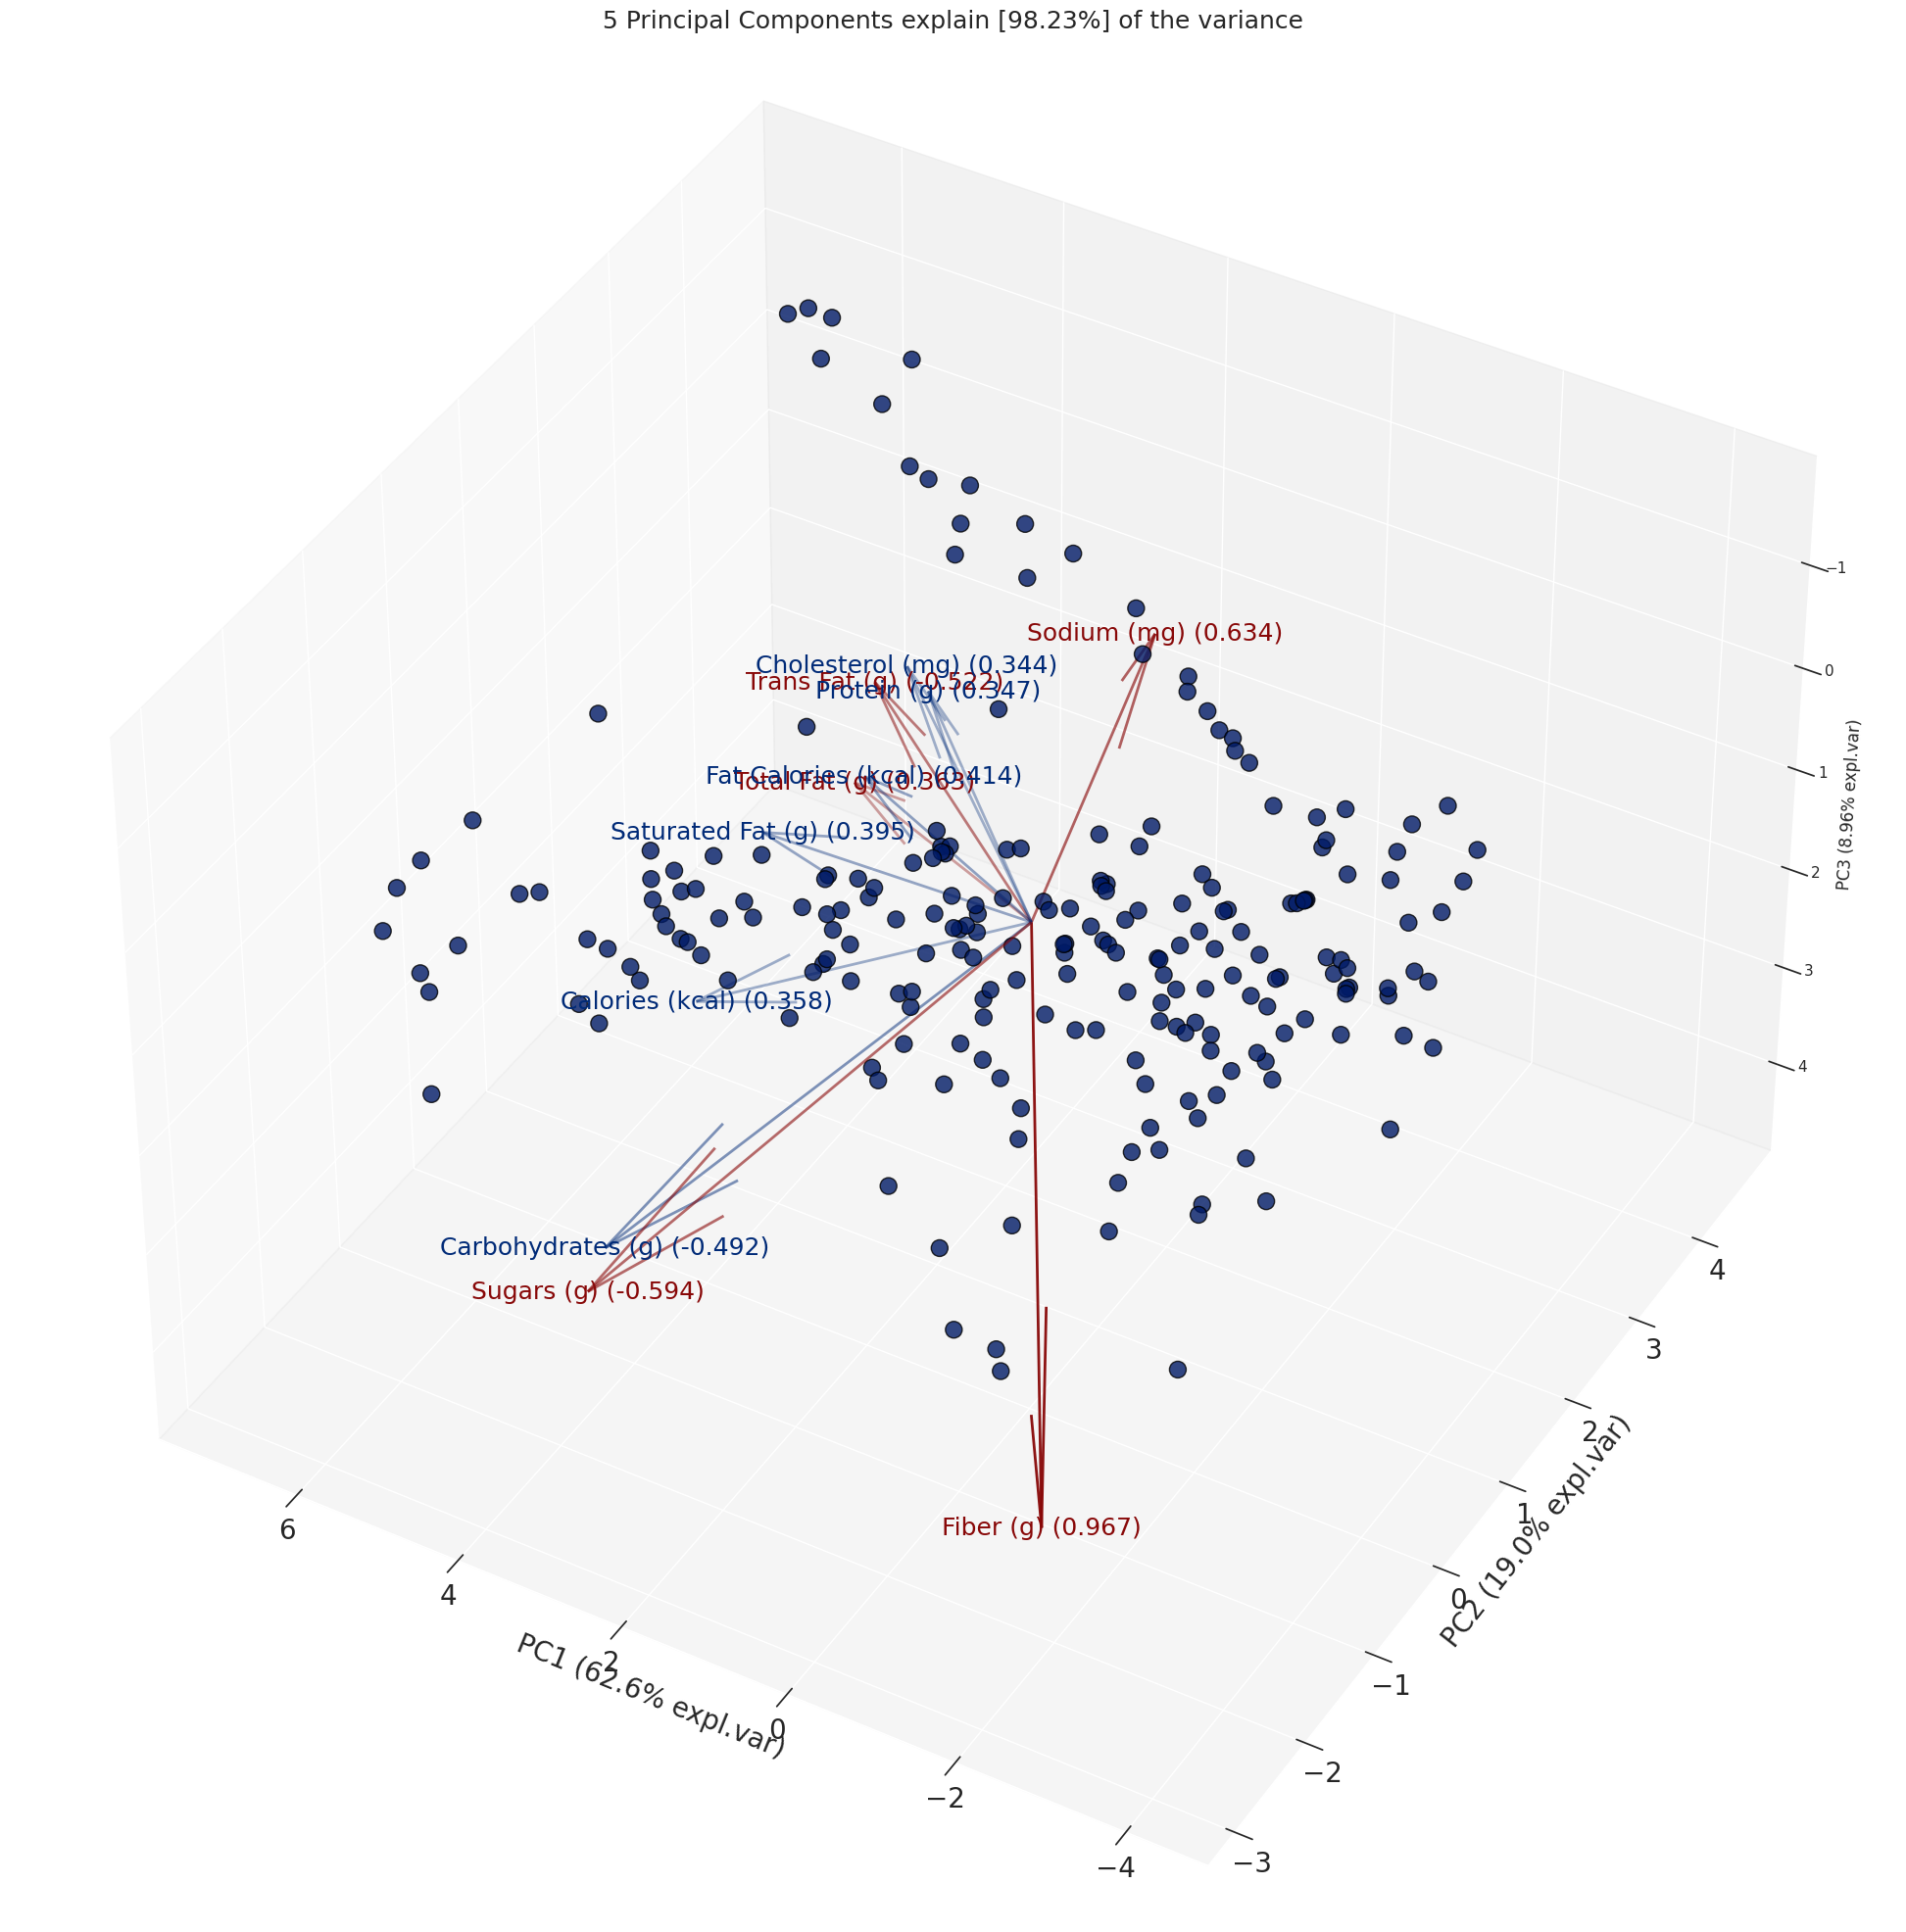

In [35]:
model.biplot3d(legend=False)

Classification using Pycaret

At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. Before applying PCA, the output from compare_models() function shows that Linear Discriminant Analayis, Extra Trees Classifier, and Gradient Boosting Classifier shows the best performance.
However, after applying PCA, the these models performance decreases and Logistic Regression, K-nearest neighbour, and Quadratic Discriminant Analysis shows the highest performance. Therefore, I have taken Logistic Regression, K-nearest Neighbour and Quadratic discriminant Analysis as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [36]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.2.0'

In [37]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (202, 12)
Unseen Data For Predictions: (23, 12)


In [38]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Comparing All Models

In [39]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [40]:
best_model

Create a Model

Catboost

In [99]:
catboost = create_model('catboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune the model

In [100]:
tuned_catboost=tune_model(catboost)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [101]:
tuned_catboost

Evaluate Catboost

In [102]:
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Create model with Lightgbm

In [103]:
lightgbm = create_model('lightgbm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune model with Lightgbm

In [104]:
tuned_lightgbm = tune_model(lightgbm)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [105]:
tuned_lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

Evaluate model with Lightgbm

In [106]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Create model with ET

In [107]:
et=create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune ET Model

In [108]:
tuned_et=tune_model(et)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Evaluate ET Model

In [109]:
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_samples_leaf=5,
                     min_samples_split=10, min_weight_fraction_leaf=0.0,
                     n_estimators=150, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [110]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [111]:
!pip install statsmodels --upgrade

Classification + PCA

In [112]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)


Comparing Models

In [113]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]


Best model with PCA

In [114]:
best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

Tune Best Model

In [115]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Evaluate Best Model

In [116]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Create Random Forest Model

In [117]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune Model

In [118]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Evaluate Model

In [119]:
tuned_rf_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [120]:
evaluate_model(tuned_rf_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Create xgboost Model

In [121]:
xgboost_pca = create_model('xgboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune Model

In [122]:
tuned_xgboost_pca = tune_model(xgboost_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Evaluate Model

In [123]:
tuned_xgboost_pca

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [124]:
evaluate_model(tuned_xgboost_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Explainable AI with Shapley values

For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, QDA) based on tree, I chose the fourth best model "Extra trees classifier" for the AI Shapley analysis.

In [125]:
lightgbm_pca = create_model('lightgbm')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [126]:
tuned_lightgbm_pca = tune_model(lightgbm_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [127]:
tuned_lightgbm_pca

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [128]:
evaluate_model(tuned_lightgbm_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [129]:
!pip install shap

In [130]:
import shap

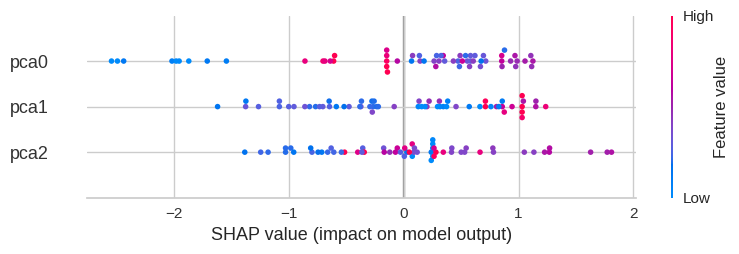

In [131]:
interpret_model(tuned_lightgbm_pca, plot='summary')


In [132]:
interpret_model(tuned_lightgbm_pca, plot='reason', observation=32)

In [133]:
interpret_model(tuned_lightgbm_pca, plot='reason')